### Plotting the source regions of the May 2024 event

This script is used to plot the source regions AR 13664 and 13667. 

To run this script the environment sunpy-env has to be activated.

In [4]:
import astropy.units as u

import sunpy.data.sample
import sunpy.map

import os

import matplotlib.pyplot as plt

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy.visualization import ImageNormalize, SqrtStretch

import sunpy.coordinates  # NOQA
import sunpy.map
from sunpy.net import Fido
from sunpy.net import attrs as a

from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import aiapy.data.sample as sample_data
from aiapy.calibrate import register, update_pointing
import seaborn as sns
from astropy.coordinates import SkyCoord
import astropy

sns.set_style('whitegrid', {'xtick.direction': 'in', 'ytick.direction': 'in'})
sns.set_context('paper')

data_path = 'data/'

if os.path.isdir(data_path) == False: os.mkdir(data_path)

print('sunpy version: ', sunpy.__version__)
print('astropy version: ', astropy.__version__)

sunpy version:  6.0.2
astropy version:  6.1.4


## 1. Load observations of AR 13664, before and after eruption of CME 1

### 1.1 Load AIA 171 

In [7]:
aia_map_before_cme1 = sunpy.map.Map(data_path+'aia.lev1_euv_12s.2024-05-08T030559Z.171.image.fits')
aia_map_after_cme1 = sunpy.map.Map(data_path+'aia.lev1_euv_12s.2024-05-08T063259Z.171.image.fits')
#print(aia_map_pe)

print('   ')
print('AIA 171 cutouts that show coronal loops before eruption of CME 1 and flare arcades after eruption')
print('   ')

plt.figure(1)
aia_map_before_cme1.plot()

plt.figure(2)
aia_map_after_cme1.plot()

AIA 171 cutouts that show coronal loops before eruption of CME 1 and flare arcades after eruption


### 1.2 Load HMI

In [18]:
hmi_map_before_cme1 = sunpy.map.Map(data_path+'hmi.m_45s.20240508_030600_TAI.2.magnetogram.fits')
hmi_map_after_cme1 = sunpy.map.Map(data_path+'hmi.m_45s.20240508_063215_TAI.2.magnetogram.fits')

## 2. Load observations of AR 13667, before and after eruption of CME 3

### 2.1 Load GONG

   
GONG observation of filament in northern hemisphere that is associated with CME 3
   


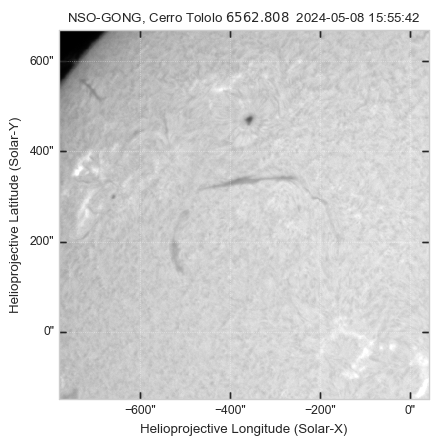

In [13]:
# Load the FITS file using astropy 
hdulist = fits.open(data_path+'20240508155542Ch.fits')

# Extract the image data and the header (metadata)
data = hdulist[0].data
header = hdulist[0].header

gong_cme3_map = sunpy.map.sources.GONGHalphaMap(data, header)

# Print the header to check for missing information
# print(header)

gong_bottom_left = SkyCoord(Tx=-780*u.arcsec, Ty=-150*u.arcsec, frame=gong_cme3_map.coordinate_frame)
gong_top_right = SkyCoord(Tx=40*u.arcsec, Ty=670*u.arcsec, frame=gong_cme3_map.coordinate_frame)
gong_cme3_submap = gong_cme3_map.submap(gong_bottom_left, top_right=gong_top_right)

print('   ')
print('GONG observation of filament in northern hemisphere that is associated with CME 3')
print('   ')

# Plot the map
gong_cme3_submap.plot(clip_interval=(0, 99.9)*u.percent)
plt.show()

### 2.2 Load AIA 171

   
AIA 171 cutout that shows dimmings and post eruptive arcades after the filament erution
   


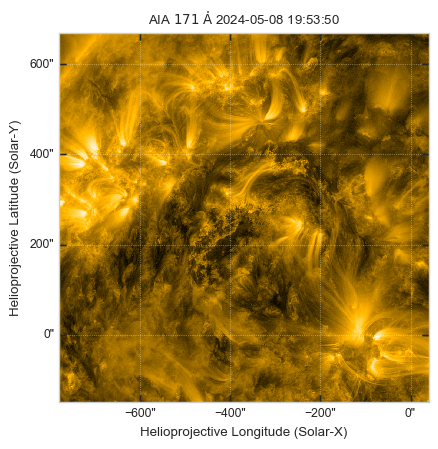

In [15]:
aia_cme3_map = sunpy.map.Map(data_path+'aia.lev1_euv_12s.2024-05-08T195352Z.171.image_lev1.fits')

aia_map_cme3_updated = update_pointing(aia_cme3_map)
aia_map_cme3_registered = register(aia_map_cme3_updated)

gong_bottom_left = SkyCoord(Tx=-780*u.arcsec, Ty=-150*u.arcsec, frame=aia_map_cme3_registered.coordinate_frame)
gong_top_right = SkyCoord(Tx=40*u.arcsec, Ty=670*u.arcsec, frame=aia_map_cme3_registered.coordinate_frame)
aia_cme3_submap = aia_map_cme3_registered.submap(gong_bottom_left, top_right=gong_top_right)

print('   ')
print('AIA 171 cutout that shows dimmings and post eruptive arcades after the filament erution')
print('   ')

plt.figure(1)
aia_cme3_submap.plot()

### 2.3 Load HMI 

In [7]:
hmi_cme3_map_gong = sunpy.map.Map(data_path+'hmi.m_45s.20240508_155615_TAI.2.magnetogram.fits')
hmi_cme3_map_aia = sunpy.map.Map(data_path+'hmi.m_45s.20240508_195230_TAI.2.magnetogram.fits')

## 3. Plot GONG and AIA observations of AR 13664 & 13667 overlaid with HMI

/Users/eva/anaconda3/envs/sunpy-env/lib/python3.12/site-packages/astropy/visualization/wcsaxes/core.py:257: UserWarning: The following kwargs were not used by contour: 'autoalign'
  cset = super().contour(*args, **kwargs)
/Users/eva/anaconda3/envs/sunpy-env/lib/python3.12/site-packages/astropy/visualization/wcsaxes/core.py:257: UserWarning: The following kwargs were not used by contour: 'autoalign'
  cset = super().contour(*args, **kwargs)
/Users/eva/anaconda3/envs/sunpy-env/lib/python3.12/site-packages/astropy/visualization/wcsaxes/core.py:257: UserWarning: The following kwargs were not used by contour: 'autoalign'
  cset = super().contour(*args, **kwargs)
/Users/eva/anaconda3/envs/sunpy-env/lib/python3.12/site-packages/astropy/visualization/wcsaxes/core.py:257: UserWarning: The following kwargs were not used by contour: 'autoalign'
  cset = super().contour(*args, **kwargs)


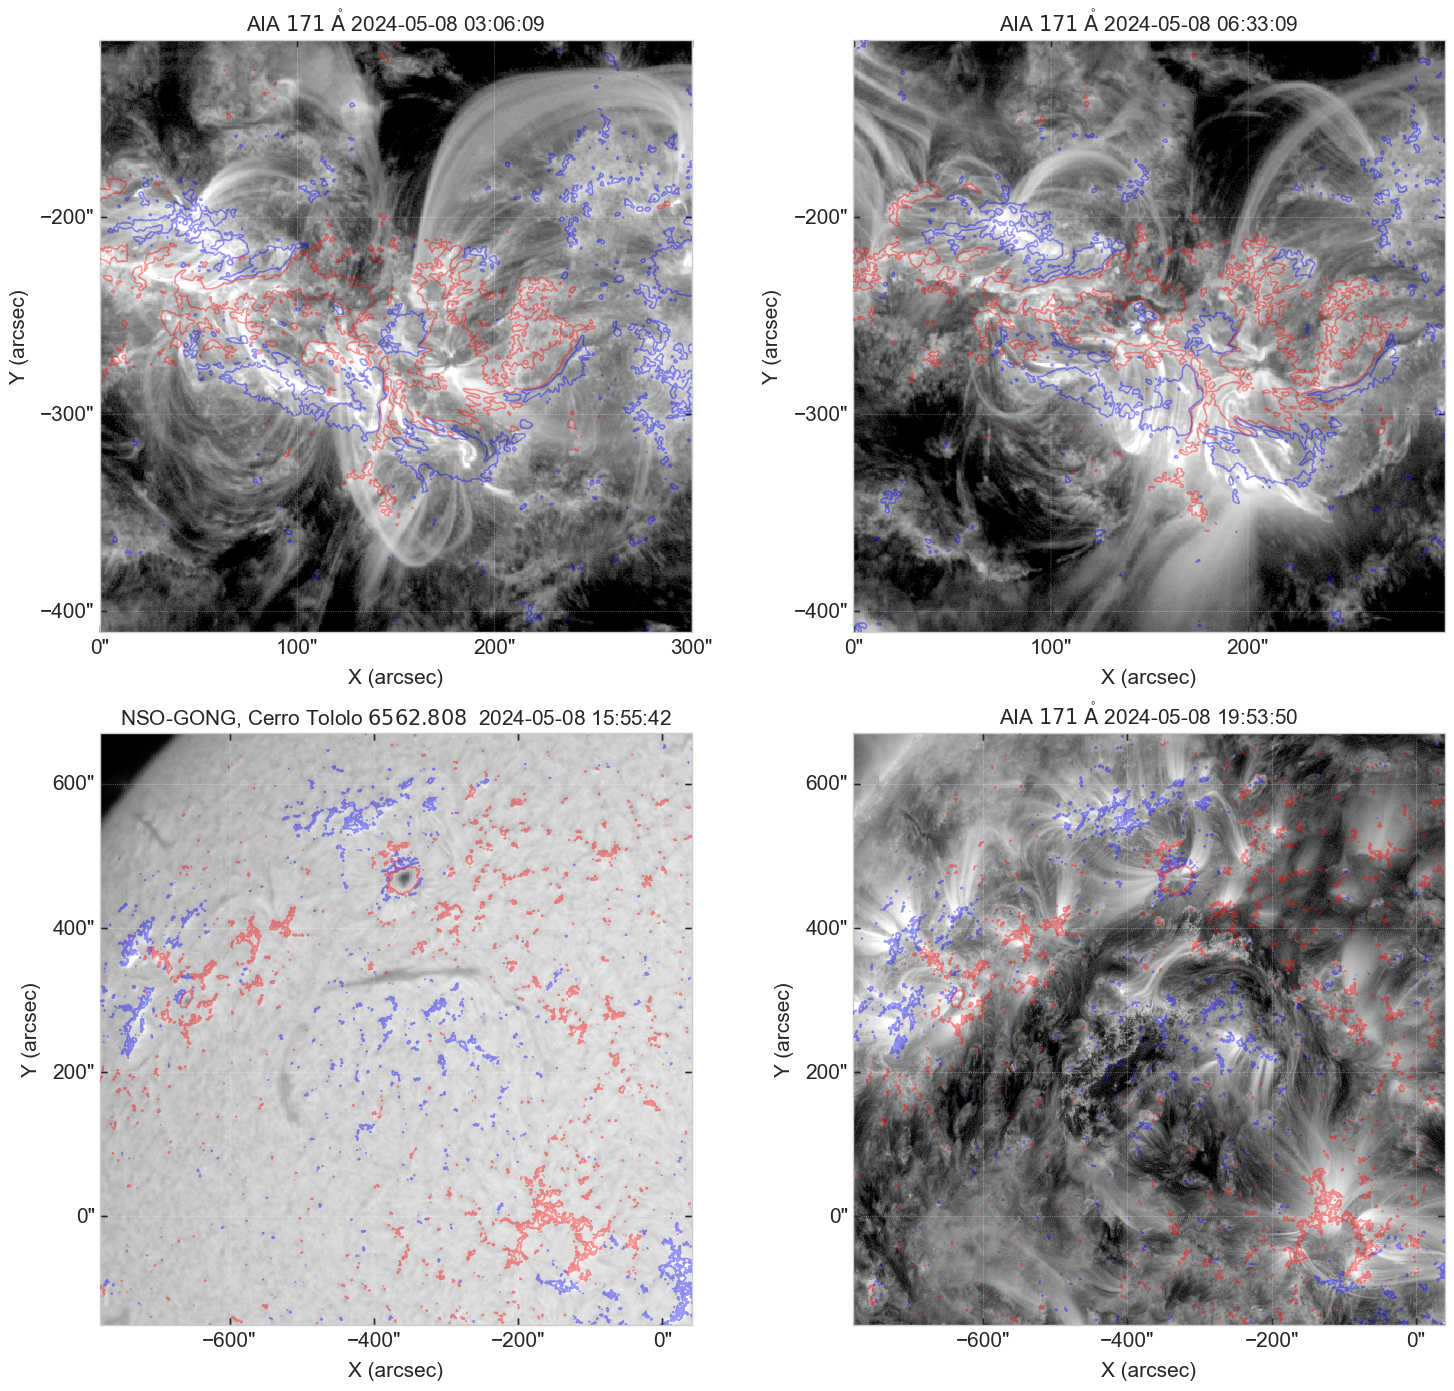

In [11]:
levels = [-300, 300] * u.Gauss
levels_gong = [-100, 100] * u.Gauss

fig = plt.figure(figsize=(15,14),dpi=100)

ax1 = fig.add_subplot(2,2,3, projection=gong_cme3_submap)
gong_cme3_submap.plot(axes=ax1, clip_interval=(0, 99.9)*u.percent)
cset = hmi_cme3_map_gong.draw_contours(levels_gong, axes=ax1, cmap='bwr', alpha=0.4, autoalign=True)

ax2 = fig.add_subplot(2,2,4, projection=aia_cme3_submap)
aia_cme3_submap.plot(axes=ax2, clip_interval=(0.3, 99.8)*u.percent,cmap='gray')
cset = hmi_cme3_map_aia.draw_contours(levels_gong, axes=ax2, cmap='bwr', alpha=0.4, autoalign=True)

ax3 = fig.add_subplot(2,2,1, projection=aia_map_before_cme1)
aia_map_before_cme1.plot(axes=ax3, clip_interval=(5, 99.3)*u.percent,cmap='gray')
cset_hmi = hmi_map_before_cme1.draw_contours(levels, axes=ax3, cmap='bwr', alpha=0.4, autoalign=True)
bounds3 = ax3.axis()

ax4 = fig.add_subplot(2,2,2, projection=aia_map_after_cme1)
aia_map_after_cme1.plot(axes=ax4, clip_interval=(5, 99.5)*u.percent,cmap='gray')

bounds = ax4.axis()
cset_hmi_after = hmi_map_after_cme1.draw_contours(levels, axes=ax4, cmap='bwr', alpha=0.4, autoalign=True)

ax3.axis(bounds3)
ax4.axis(bounds)
ax1.set_xlabel('X (arcsec)')
ax1.set_ylabel('Y (arcsec)')
ax2.set_xlabel('X (arcsec)')
ax2.set_ylabel('Y (arcsec)')
ax3.set_xlabel('X (arcsec)')
ax3.set_ylabel('Y (arcsec)')
ax4.set_xlabel('X (arcsec)')
ax4.set_ylabel('Y (arcsec)')
ax1.tick_params(axis='x', labelsize=15)
ax1.tick_params(axis='y', labelsize=15)
ax2.tick_params(axis='x', labelsize=15)
ax2.tick_params(axis='y', labelsize=15)
ax3.tick_params(axis='x', labelsize=15)
ax3.tick_params(axis='y', labelsize=15)
ax4.tick_params(axis='x', labelsize=15)
ax4.tick_params(axis='y', labelsize=15)
ax1.set_xlabel(ax1.get_xlabel(), fontsize=15)
ax1.set_ylabel(ax1.get_ylabel(), fontsize=15)
ax2.set_xlabel(ax2.get_xlabel(), fontsize=15)
ax2.set_ylabel(ax2.get_ylabel(), fontsize=15)
ax3.set_xlabel(ax3.get_xlabel(), fontsize=15)
ax3.set_ylabel(ax3.get_ylabel(), fontsize=15)
ax4.set_xlabel(ax4.get_xlabel(), fontsize=15)
ax4.set_ylabel(ax4.get_ylabel(), fontsize=15)
ax1.set_title(ax1.get_title(), fontsize=15)
ax2.set_title(ax2.get_title(), fontsize=15)
ax3.set_title(ax3.get_title(), fontsize=15)
ax4.set_title(ax4.get_title(), fontsize=15)

plt.tight_layout()
#plt.savefig('source_region_handedness_INGRID1.pdf')
plt.show()